In [112]:
import re
import os
import ast
import pandas as pd

In [113]:
# Folder path
paths=["exp_results_new","exp_results_new_"]
# paths=["exp_results_new_"]

# Prefix to filter files
goals=['clid','ce','ce_sloss','mae']
# Initialize a list to store results
datasets=['cifar100_']
prefixs=[]
for goal in goals:
    for dataset in datasets:
        prefixs.append(f"vri_resnet18_{goal}-{dataset}")
results =[]




# Iterate over files in the folder
for folder_path in paths:
    
    for file_prefix in prefixs:
        for filename in os.listdir(folder_path):
            # Check if the file name starts with the desired prefix
            if filename.startswith(file_prefix) and 'tau' in filename:
                
                # Full file path
                file_path = os.path.join(folder_path, filename)
                print(filename)
                # Extract dataset, corruption_type, and corruption_prob from the filename
                _, rest = filename.split(file_prefix, 1)
                atts=rest.split("_")
                # dataset, corruption_type, corruption_prob= atts[:3]
                corruption_type, corruption_prob= atts[:2]
                tau=float(atts[-3].split('tau')[1])
                best_acc=-1
                best_epoch_end_acc_5 = -1
                best_epoch_end_acc_1 = -1
                best_epoch_accu_5 = -1
                best_epoch_accu_1 = -1
                best_ema_acc=-1
                best_epoch_accu_3=-1
                # Read the file and extract the best accuracy
                
                cond="epoch:[150"
                    
                with open(file_path, 'r') as file:
                    for line in file:
                        if "epoch_end:" in line:
                            match = re.search(r"epoch_end:\s*({.*})", line)
                            if match:
                                epoch_end = ast.literal_eval(match.group(1))
                                if 'acc_5' in epoch_end:
                                    best_epoch_end_acc_5 = epoch_end['acc_5']
                                if 'acc_1' in epoch_end:
                                    best_epoch_end_acc_1 = epoch_end['acc_1'] 
                        # Extract the `epoch_accu` dictionary
                        elif "epoch_accu:" in line:
                            match = re.search(r"epoch_accu:\s*({.*})", line)
                            if match:
                                epoch_accu = ast.literal_eval(match.group(1))
                                if 'acc_5' in epoch_accu:
                                    best_epoch_accu_5 = epoch_accu['acc_5']
                                if 'acc_1' in epoch_accu:
                                    best_epoch_accu_1 = epoch_accu['acc_1']
                                if 'acc_3' in epoch_accu:
                                    best_epoch_accu_3 = epoch_accu['acc_3']       
                        if "test_acc" in line:
                            test_acc_match = re.search(r"test_acc:([\d.]+)", line)
                            last_acc = float(test_acc_match.group(1))
                            match = re.search(r"epoch:\[(\d+)/(\d+)\]", line)
                            if match:
                                current_epoch = int(match.group(1))
                            if last_acc>best_acc:
                                best_acc=last_acc
                                best_epoch=current_epoch


                        if cond in line:
                            results.append({
                                "dataset": file_prefix,
                                "corruption_type": corruption_type,
                                "corruption_prob": float(corruption_prob),
                                'tau':tau,
                                "best_acc": best_acc,
                                "last_acc": last_acc,
                                "best_epoch":best_epoch,
                                "best_epoch_accu_5":best_epoch_accu_5*100,
                                "best_epoch_accu_3":best_epoch_accu_3*100,
                                "best_epoch_accu_1":best_epoch_accu_1*100,
                                "best_epoch_acc_5":best_epoch_end_acc_5*100,
                                "best_epoch_acc_1":best_epoch_end_acc_1*100,                        
                            })
                            best_acc=-1
                            best_epoch_end_acc_5 = -1
                            best_epoch_end_acc_1 = -1
                            best_epoch_accu_5 = -1
                            best_epoch_accu_1 = -1
                            best_ema_acc=-1
                            best_epoch_accu_3=-1
                        # if "best_acc:" in line:
                        #     # Extract the numeric value of best_acc
                        #     # best_acc = float(re.search(r"best_acc:\s+([\d.]+)", line).group(1))
                        #     results.append({
                        #         "dataset": file_prefix,
                        #         "corruption_type": corruption_type,
                        #         "corruption_prob": float(corruption_prob),
                        #         'tau':tau,
                        #         "best_acc": best_acc,
                        #         "last_acc": last_acc,
                                
                        #         "best_epoch_accu_5":best_epoch_accu_5*100,
                        #         "best_epoch_accu_3":best_epoch_accu_3*100,
                        #         "best_epoch_accu_1":best_epoch_accu_1*100,
                        #         "best_epoch_acc_5":best_epoch_end_acc_5*100,
                        #         "best_epoch_acc_1":best_epoch_end_acc_1*100,                          
                        #     })
                        #     break  # Stop reading the file once best_acc is found

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Group by (dataset, corruption_type, corruption_prob) and calculate average and std
# grouped_results_ = results_df.groupby(["dataset", "corruption_type", "corruption_prob"])[["best_acc",'last_acc',"best_epoch_acc_5"]].agg(['mean', 'std']).reset_index()

# Display the grouped results


vri_resnet18_clid-cifar100_flip_               0.4_10_0.0_0.0_0.0_lr_0.02_meta_lr_0.01_es_100_tau0.5_gamma1_seed1.txt
vri_resnet18_clid-cifar100_flip_               0.4_10_0.0_0.0_0.0_lr_0.02_meta_lr_0.01_es_100_tau0.5_gamma1_seed3.txt
vri_resnet18_clid-cifar100_flip_               0.4_10_0.0_0.0_0.0_lr_0.02_meta_lr_0.01_es_100_tau0.5_gamma1_seed4.txt
vri_resnet18_clid-cifar100_flip_               0.4_10_0.0_0.0_0.0_lr_0.02_meta_lr_0.01_es_100_tau1.0_gamma1_seed1.txt
vri_resnet18_clid-cifar100_flip_               0.4_10_0.0_0.0_0.0_lr_0.02_meta_lr_0.01_es_100_tau2.0_gamma1_seed3.txt
vri_resnet18_clid-cifar100_inst_               0.4_10_0.0_0.0_0.0_lr_0.02_meta_lr_0.01_es_100_tau0.5_gamma1_seed3.txt
vri_resnet18_clid-cifar100_inst_               0.4_10_0.0_0.0_0.0_lr_0.02_meta_lr_0.01_es_100_tau0.5_gamma1_seed4.txt
vri_resnet18_clid-cifar100_inst_               0.4_10_0.0_0.0_0.0_lr_0.02_meta_lr_0.01_es_100_tau1.0_gamma1_seed1.txt
vri_resnet18_clid-cifar100_inst_               0.4_10_0.

In [136]:
def top3_best_acc(group):
    """
    Select the top 3 rows with the highest 'best_acc' within each group.
    """
    # Sort values by 'best_acc' in descending order
    group = group.sort_values(by="best_acc", ascending=False)
    
    # Ensure we select only the top 3 rows
    return group.head(3)
top3_results = (
    results_df.groupby(["dataset","corruption_type", "corruption_prob","tau"], group_keys=False)
    .apply(top3_best_acc)
)
grouped_results_ = top3_results.groupby(["dataset","corruption_type", "corruption_prob",'tau'])[["best_acc",'last_acc',"best_epoch_acc_5"]].agg(['mean', 'std']).reset_index()

grouped_results_.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col 
                            for col in grouped_results_.columns]

# Combine mean and std into "mean ± std" format
for col in ["best_acc", "last_acc", "best_epoch_acc_5",]:
    grouped_results_[col] = (
        grouped_results_[f"{col}_mean"].round(2).astype(str) + 
        " ± " +
        grouped_results_[f"{col}_std"].round(2).astype(str)
    )

# Drop intermediate mean and std columns
grouped_results = grouped_results_.drop(
    columns=[f"{col}_mean" for col in ["best_acc", "last_acc", "best_epoch_acc_5"]] +
            [f"{col}_std" for col in ["best_acc", "last_acc", "best_epoch_acc_5"]]
)

# Transpose the DataFrame for readability
grouped_results_T = grouped_results.T


/tmp/ipykernel_2270107/3851985044.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(top3_best_acc)


In [137]:
grouped_results_T

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
dataset_,vri_resnet18_ce-cifar100_,vri_resnet18_ce-cifar100_,vri_resnet18_ce-cifar100_,vri_resnet18_ce-cifar100_,vri_resnet18_ce-cifar100_,vri_resnet18_ce-cifar100_,vri_resnet18_clid-cifar100_,vri_resnet18_clid-cifar100_,vri_resnet18_clid-cifar100_,vri_resnet18_clid-cifar100_,...,vri_resnet18_clid-cifar100_,vri_resnet18_clid-cifar100_,vri_resnet18_clid-cifar100_,vri_resnet18_clid-cifar100_,vri_resnet18_mae-cifar100_,vri_resnet18_mae-cifar100_,vri_resnet18_mae-cifar100_,vri_resnet18_mae-cifar100_,vri_resnet18_mae-cifar100_,vri_resnet18_mae-cifar100_
corruption_type_,flip,inst,inst,unif,unif,unif,flip,flip,flip,human,...,unif,unif,unif,unif,flip,human,inst,inst,unif,unif
corruption_prob_,0.4,0.4,0.6,0.2,0.4,0.6,0.4,0.4,0.4,0.0,...,0.6,0.6,0.6,0.6,0.4,0.0,0.4,0.6,0.2,0.4
tau_,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1.0,2.0,0.1,...,0.5,0.7,1.0,1.5,0.5,0.5,0.5,0.5,0.5,0.5
best_acc,63.24 ± 0.19,62.68 ± 0.91,45.44 ± nan,71.23 ± nan,65.94 ± 0.19,57.51 ± nan,62.42 ± 1.52,61.0 ± nan,61.91 ± nan,64.11 ± 0.16,...,59.02 ± 0.04,58.82 ± 0.53,59.02 ± 0.21,59.15 ± 0.44,55.36 ± 1.23,8.35 ± nan,62.39 ± nan,39.35 ± nan,71.69 ± nan,65.53 ± nan
last_acc,62.37 ± 0.23,54.26 ± 6.46,42.56 ± nan,70.01 ± nan,63.26 ± 0.06,52.35 ± nan,60.54 ± 0.87,60.83 ± nan,59.8 ± nan,63.74 ± 0.69,...,58.89 ± 0.13,58.75 ± 0.58,58.61 ± 0.35,58.92 ± 0.36,54.28 ± 1.58,8.29 ± nan,59.17 ± nan,33.32 ± nan,70.84 ± nan,62.94 ± nan
best_epoch_acc_5,62.14 ± 2.59,65.39 ± 1.48,50.08 ± nan,71.57 ± nan,60.55 ± 9.02,58.97 ± nan,63.7 ± 1.3,64.48 ± nan,64.44 ± nan,64.79 ± 0.06,...,60.66 ± 0.22,59.57 ± 0.57,59.48 ± 0.58,60.04 ± 0.33,56.7 ± 1.91,8.31 ± nan,63.66 ± nan,38.58 ± nan,73.41 ± nan,67.22 ± nan


In [138]:
grouped_results[(grouped_results['corruption_prob_'] == 0.6) & (grouped_results['corruption_type_'] == 'inst')].T

,2,21,22,23,35
dataset_,vri_resnet18_ce-cifar100_,vri_resnet18_clid-cifar100_,vri_resnet18_clid-cifar100_,vri_resnet18_clid-cifar100_,vri_resnet18_mae-cifar100_
corruption_type_,inst,inst,inst,inst,inst
corruption_prob_,0.6,0.6,0.6,0.6,0.6
tau_,0.5,0.1,0.5,1.0,0.5
best_acc,45.44 ± nan,41.83 ± nan,42.49 ± 0.89,43.51 ± 0.54,39.35 ± nan
last_acc,42.56 ± nan,41.18 ± nan,38.34 ± 4.94,38.48 ± 5.55,33.32 ± nan
best_epoch_acc_5,50.08 ± nan,41.38 ± nan,42.7 ± 3.12,42.48 ± 2.69,38.58 ± nan


In [139]:
# s=top3_results[top3_results['corruption_prob']==0.4]
s = top3_results[(top3_results['corruption_prob'] == 0.4) & (top3_results['corruption_type'] == 'inst') & (top3_results['dataset'] == 'vri_resnet18_clid-cifar100_')]


In [140]:
s

,dataset,corruption_type,corruption_prob,tau,best_acc,last_acc,best_epoch,best_epoch_accu_5,best_epoch_accu_3,best_epoch_accu_1,best_epoch_acc_5,best_epoch_acc_1
43,vri_resnet18_clid-cifar100_,inst,0.4,0.1,67.00,66.94,130,68.11,67.51,64.35,69.02,66.72
44,vri_resnet18_clid-cifar100_,inst,0.4,0.1,66.75,66.27,110,68.26,66.78,65.31,68.97,64.06
45,vri_resnet18_clid-cifar100_,inst,0.4,0.3,66.43,66.43,149,66.73,66.85,63.77,68.13,63.03
46,vri_resnet18_clid-cifar100_,inst,0.4,0.3,66.03,65.28,111,67.35,67.59,65.28,68.75,65.40
7,vri_resnet18_clid-cifar100_,inst,0.4,0.5,66.45,66.37,130,67.53,67.89,66.37,67.90,66.37
6,vri_resnet18_clid-cifar100_,inst,0.4,0.5,66.33,66.33,150,66.93,67.10,65.44,68.81,64.92
8,vri_resnet18_clid-cifar100_,inst,0.4,0.5,66.30,65.90,90,66.71,67.05,65.90,68.71,63.19
48,vri_resnet18_clid-cifar100_,inst,0.4,0.7,66.52,66.27,131,68.59,68.15,66.27,68.68,65.99
47,vri_resnet18_clid-cifar100_,inst,0.4,0.7,66.43,65.99,109,67.08,67.58,65.99,68.56,65.86
9,vri_resnet18_clid-cifar100_,inst,0.4,1.0,67.04,66.02,110,67.43,68.11,66.43,68.81,66.02


In [141]:

# grouped_results_ = s.groupby(["tau"])[["best_acc", "best_epoch_acc_5"]].agg(['min']).reset_index()

# grouped_results_.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col 
#                             for col in grouped_results_.columns]

# # Combine mean and std into "mean ± std" format
# for col in ["best_acc", "best_epoch_acc_5",]:
#     grouped_results_[col] = (
#         grouped_results_[f"{col}_mean"].round(2).astype(str) + 
#         " ± " +
#         grouped_results_[f"{col}_std"].round(2).astype(str)
#     )

# # Drop intermediate mean and std columns
# grouped_results = grouped_results_.drop(
#     columns=[f"{col}_mean" for col in ["best_acc",  "best_epoch_acc_5"]] +
#             [f"{col}_std" for col in ["best_acc", "best_epoch_acc_5"]]
# )

# # Transpose the DataFrame for readability
# grouped_results_T = grouped_results.T


In [142]:
# grouped_results_T

In [143]:
grouped_results_

tau best_acc                         best_epoch_acc_5                   \
           mean       std    max    min             mean       std    max   
0  0.1   66.875  0.176777  67.00  66.75        68.995000  0.035355  69.02   
1  0.3   66.230  0.282843  66.43  66.03        68.440000  0.438406  68.75   
2  0.5   66.360  0.079373  66.45  66.30        68.473333  0.499032  68.81   
3  0.7   66.475  0.063640  66.52  66.43        68.620000  0.084853  68.68   
4  1.0   66.670  0.337194  67.04  66.38        68.413333  0.390171  68.81   

          
     min  
0  68.97  
1  68.13  
2  67.90  
3  68.56  
4  68.03

In [144]:
# #cifar100 unif0.6 clid vri 
# import matplotlib.pyplot as plt
# grouped_results_ .sort_values(by='tau', inplace=True)
# plt.figure(figsize=(5, 2.5))
# plt.errorbar(grouped_results_ ['tau'],grouped_results_ [('best_acc','mean')],yerr=grouped_results_[('best_acc','std')],label='best',marker='o')
# # plt.errorbar(grouped_results_['tau'],grouped_results_[('best_epoch_acc_5','mean')],yerr=grouped_results_[('best_epoch_acc_5','std')],,marker='o')
# plt.errorbar(grouped_results_['tau'],grouped_results_[('best_epoch_acc_5','mean')],yerr=grouped_results_[('best_epoch_acc_5','std')],label='ensemble',marker='^')
# # plt.errorbar(grouped_results_['tau'],grouped_results_[('best_epoch_acc_5','max')],marker='o')
# # plt.errorbar(grouped_results_['tau'],grouped_results_[('best_epoch_acc_5','min')],marker='o')

# plt.xticks(grouped_results_ ['tau'],fontsize=14)  # Rotate for better readability if needed
# plt.legend()
# plt.yticks(fontsize=14)
# plt.xlabel(r'$\tau$',fontsize=14)
# plt.ylabel('Ensemble Accuracy',fontsize=14)

# # plt.ylim(57,62)

Text(0.5, 1.0, 'CIFAR-100 IDN 40%')

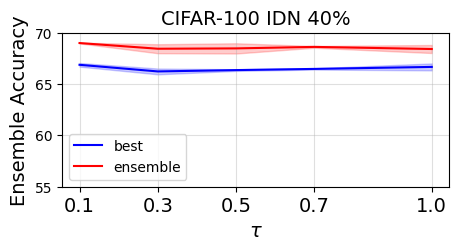

In [155]:
import numpy as np
import matplotlib.pyplot as plt
s = top3_results[(top3_results['corruption_prob'] == 0.4) & (top3_results['corruption_type'] == 'inst') & (top3_results['dataset'] == 'vri_resnet18_clid-cifar100_')]
grouped_results_ = s.groupby(["tau"])[["best_acc","best_epoch_acc_5"]].agg(['mean', 'std','max','min']).reset_index()
grouped_results_ = grouped_results_.dropna(subset=[('best_acc','std')])
name='CIFAR-100 IDN 40%'
plt.figure(figsize=(5, 2))
plt.plot(grouped_results_ ['tau'],grouped_results_ [('best_acc','mean')],label='best', color='blue')  # Line plot
plt.fill_between(grouped_results_ ['tau'], grouped_results_[('best_acc','mean')]-grouped_results_[('best_acc','std')],\
                 grouped_results_[('best_acc','mean')]+grouped_results_[('best_acc','std')], color='blue', alpha=0.2)  # Shaded region

plt.plot(grouped_results_ ['tau'],grouped_results_ [('best_epoch_acc_5','mean')],label='ensemble', color='red')  # Line plot
plt.fill_between(grouped_results_ ['tau'], grouped_results_[('best_epoch_acc_5','mean')]-grouped_results_[('best_epoch_acc_5','std')],\
                 grouped_results_[('best_epoch_acc_5','mean')]+grouped_results_[('best_epoch_acc_5','std')], color='red', alpha=0.2)  # Shaded region

plt.xticks(grouped_results_ ['tau'],fontsize=14)  # Rotate for better readability if needed
plt.legend()
# plt.yticks([63,64,65,66,67],fontsize=14)
plt.xlabel(r'$\tau$',fontsize=14)
plt.ylabel('Ensemble Accuracy',fontsize=14)

plt.grid(alpha=0.4)
plt.ylim(55,70)
plt.title(name,fontsize=14)
# Show the plot
# plt.show()
# plt.savefig(f'{name}.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution

In [124]:
# grouped_results_n=grouped_results_.copy()

Text(0.5, 1.0, 'CIFAR-100N')

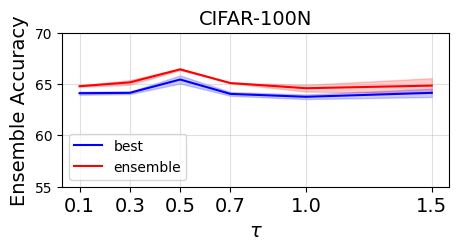

In [154]:
s=top3_results[(top3_results['corruption_prob'] == 0) & (top3_results['corruption_type'] == 'human') & (top3_results['dataset'] == 'vri_resnet18_clid-cifar100_')]
grouped_results_ = s.groupby(["tau"])[["best_acc","best_epoch_acc_5"]].agg(['mean', 'std','max','min']).reset_index()
name='CIFAR-100N'
plt.figure(figsize=(5, 2))
plt.plot(grouped_results_['tau'],grouped_results_[('best_acc','mean')],label='best', color='blue')  # Line plot
plt.fill_between(grouped_results_['tau'], grouped_results_[('best_acc','mean')]-grouped_results_[('best_acc','std')],\
                 grouped_results_[('best_acc','mean')]+grouped_results_[('best_acc','std')], color='blue', alpha=0.2)  # Shaded region

plt.plot(grouped_results_['tau'],grouped_results_[('best_epoch_acc_5','mean')],label='ensemble', color='red')  # Line plot
plt.fill_between(grouped_results_['tau'], grouped_results_[('best_epoch_acc_5','mean')]-grouped_results_[('best_epoch_acc_5','std')],\
                 grouped_results_[('best_epoch_acc_5','mean')]+grouped_results_[('best_epoch_acc_5','std')], color='red', alpha=0.2)  # Shaded region

plt.xticks(grouped_results_['tau'],fontsize=14)  # Rotate for better readability if needed
plt.legend()
# plt.yticks([63,64,65,66,67],fontsize=14)
plt.xlabel(r'$\tau$',fontsize=14)
plt.ylabel('Ensemble Accuracy',fontsize=14)

plt.grid(alpha=0.4)
plt.ylim(55,70)
plt.title(name,fontsize=14)
# Show the plot
# plt.show()
# plt.savefig(f'{name}.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution

Text(0.5, 1.0, 'CIFAR-100 Sym 60%')

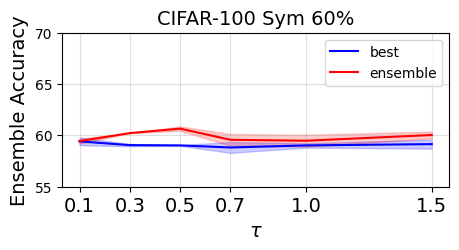

In [153]:
s=top3_results[(top3_results['corruption_prob'] == 0.6) & (top3_results['corruption_type'] == 'unif') & (top3_results['dataset'] == 'vri_resnet18_clid-cifar100_')]
grouped_results_ = s.groupby(["tau"])[["best_acc","best_epoch_acc_5"]].agg(['mean', 'std','max','min']).reset_index()
name='CIFAR-100 Sym 60%'
plt.figure(figsize=(5, 2))
plt.plot(grouped_results_ ['tau'],grouped_results_ [('best_acc','mean')],label='best', color='blue')  # Line plot
plt.fill_between(grouped_results_ ['tau'], grouped_results_[('best_acc','mean')]-grouped_results_[('best_acc','std')],\
                 grouped_results_[('best_acc','mean')]+grouped_results_[('best_acc','std')], color='blue', alpha=0.2)  # Shaded region

plt.plot(grouped_results_ ['tau'],grouped_results_ [('best_epoch_acc_5','mean')],label='ensemble', color='red')  # Line plot
plt.fill_between(grouped_results_ ['tau'], grouped_results_[('best_epoch_acc_5','mean')]-grouped_results_[('best_epoch_acc_5','std')],\
                 grouped_results_[('best_epoch_acc_5','mean')]+grouped_results_[('best_epoch_acc_5','std')], color='red', alpha=0.2)  # Shaded region

plt.xticks(grouped_results_ ['tau'],fontsize=14)  # Rotate for better readability if needed
plt.legend()
# plt.yticks(range(58,63,1),fontsize=14)
plt.xlabel(r'$\tau$',fontsize=14)
plt.ylabel('Ensemble Accuracy',fontsize=14)

plt.grid(alpha=0.4)
plt.ylim(55,70)
plt.title(name,fontsize=14)
# Show the plot
# plt.show()
# plt.savefig(f'{name}.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution